In [1]:
import numpy as np
from numpy.typing import NDArray
from numpy import float_
import matplotlib.pyplot as plt
from time import time

from typing import Union
from numpy.typing import NDArray
from numpy import float_

from tqdm import tqdm

from brownian_motion import simulate_brownian_motion_from_increments, simulate_brownian_motion_from_brownian_bridge

In [2]:
rng = np.random.default_rng(seed=0xBEDABEDA)

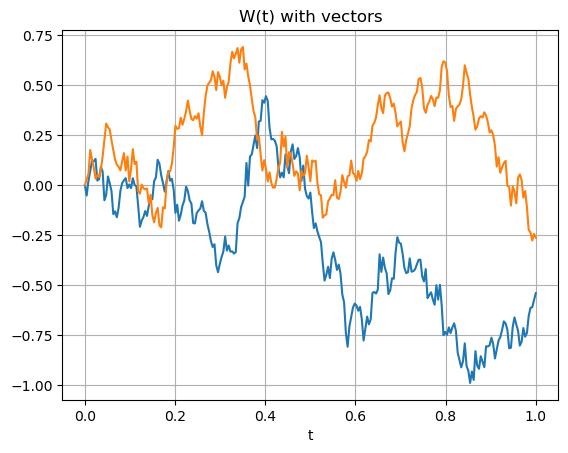

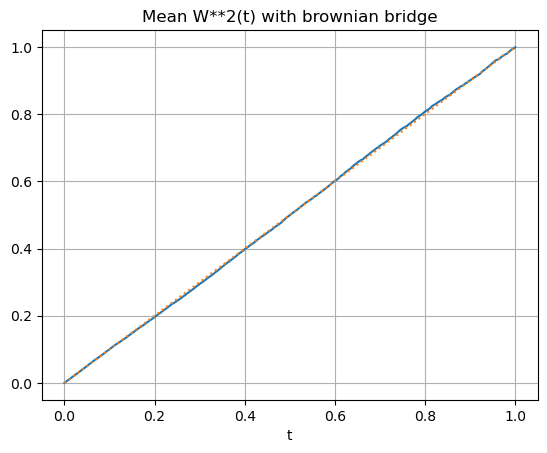

In [10]:
size = 10_000
t_grid = np.linspace(0, 1, 255)
dim = 2

W = simulate_brownian_motion_from_brownian_bridge(size, t_grid, dim, rng)

plt.plot(t_grid, W[0, :, :].T)
plt.grid()
plt.xlabel("t")
plt.title("W(t) with vectors")
plt.show()

plt.plot(t_grid, (W**2).mean(axis=0).mean(axis=0))
plt.plot(t_grid, t_grid, ":")
plt.grid()
plt.xlabel("t")
plt.title("Mean W**2(t) with brownian bridge")
plt.show()

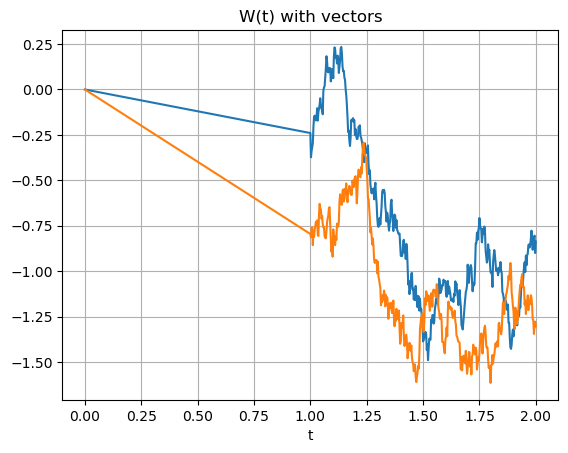

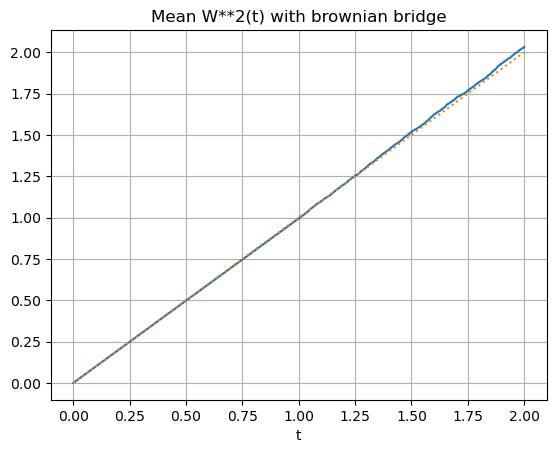

In [ ]:
# non-uniform t_grid
size = 10_000
t_grid = np.concatenate([np.zeros(1), np.linspace(1, 2, 365)])
dim = 2

W = simulate_brownian_motion_from_brownian_bridge(size, t_grid, dim, rng)

plt.plot(t_grid, W[0, :, :].T)
plt.grid()
plt.xlabel("t")
plt.title("W(t) with vectors")
plt.show()

plt.plot(t_grid, (W**2).mean(axis=0).mean(axis=0))
plt.plot(t_grid, t_grid, ":")
plt.grid()
plt.xlabel("t")
plt.title("Mean W**2(t) with brownian bridge")
plt.show()

In [12]:
size = 1
t_grid = np.linspace(0, 1, 10_000)
dim = 2

W = simulate_brownian_motion_from_brownian_bridge(size, t_grid, dim, rng)

print("Correlation coefficient: \n", np.corrcoef(np.diff(W, axis=2)[0]))

Correlation coefficient: 
 [[ 1.         -0.00767627]
 [-0.00767627  1.        ]]


# Compare speed

In [21]:
size = 1
t_grid = np.linspace(0, 10, 10**5)
dim = 2

100%|██████████| 100/100 [00:02<00:00, 33.55it/s]


Median vestors:  0.02350783348083496
Median increments:  0.005550861358642578


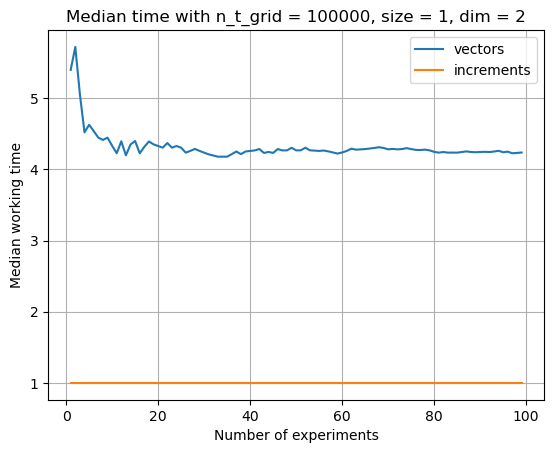

In [22]:
n = 100
t_increments = np.zeros(n)
t_vectors = np.zeros(n)
t_increments = np.zeros(n)

median_increments = np.zeros(n)
median_vectors = np.zeros(n)
median_increments = np.zeros(n)

for i in tqdm(range(n)):
    t0 = time()
    W = simulate_brownian_motion_from_brownian_bridge(size, t_grid, dim, rng)
    t_vectors[i]= time()-t0
    median_vectors[i] = np.median(t_vectors[:i])

    t0 = time()
    W = simulate_brownian_motion_from_increments(size, t_grid, dim, rng)
    t_increments[i]= time()-t0
    median_increments[i] = np.median(t_increments[:i])

print("Median vestors: ", np.median(t_vectors))
print("Median increments: ", np.median(t_increments))

plt.plot(median_vectors / median_increments, label="vectors")
plt.plot(median_increments / median_increments, label="increments")
plt.grid()
plt.legend()
plt.title("Median time with n_t_grid = {n_t_grid}, size = {size}, dim = {dim}".format(n_t_grid=t_grid.size, size=size, dim=dim))
plt.xlabel("Number of experiments")
plt.ylabel("Median working time")
plt.show()

# Working time from n_t_grid

100%|██████████| 10/10 [00:11<00:00,  1.14s/it]


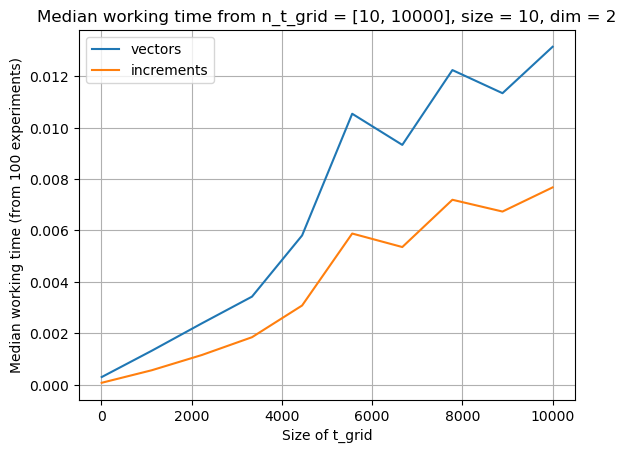

In [17]:
size = 10
dim = 2

n = 100
t_increments = np.zeros(n)
t_vectors = np.zeros(n)

n_t_grid = np.linspace(10, 10**4, 10).astype(int)

median_increments = np.zeros(n_t_grid.shape[0])
median_vectors = np.zeros(n_t_grid.shape[0])

for j in tqdm(range(n_t_grid.shape[0])):
    t_grid = np.arange(0, n_t_grid[j])
    for i in range(n):
        t0 = time()
        W = simulate_brownian_motion_from_brownian_bridge(size, t_grid, dim, rng)
        t_vectors[i]= time()-t0
    

        t0 = time()
        W = simulate_brownian_motion_from_increments(size, t_grid, dim, rng)
        t_increments[i]= time()-t0
    median_vectors[j] = np.median(t_vectors)
    median_increments[j] = np.median(t_increments)

plt.plot(n_t_grid, median_vectors, label="vectors")
plt.plot(n_t_grid, median_increments, label="increments")
plt.grid()
plt.legend()
plt.title("Median working time from n_t_grid = [{t_min}, {t_max}], size = {size}, dim = {dim}".format(t_min=n_t_grid[0], t_max=n_t_grid[-1],
                                                                                                      size=size, dim=dim))
plt.xlabel("Size of t_grid")
plt.ylabel("Median working time (from "+str(n)+" experiments)")
plt.show()

# Working time from size

100%|██████████| 10/10 [02:06<00:00, 12.70s/it]


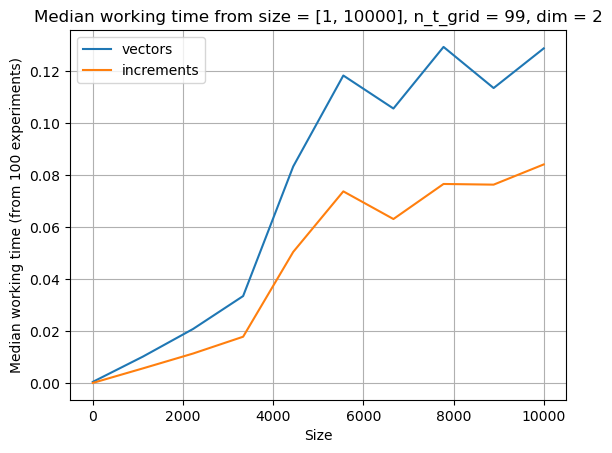

In [18]:
t_grid = np.arange(0, 100)
dim = 2

n = 100
t_increments = np.zeros(n)
t_vectors = np.zeros(n)

size_array = np.linspace(1, 10_000, 10).astype(int)


median_increments = np.zeros(size_array.shape[0])
median_vectors = np.zeros(size_array.shape[0])

for j in tqdm(range(size_array.shape[0])):
    for i in range(n):
        t0 = time()
        W = simulate_brownian_motion_from_brownian_bridge(size_array[j], t_grid, dim, rng)
        t_vectors[i]= time()-t0
    

        t0 = time()
        W = simulate_brownian_motion_from_increments(size_array[j], t_grid, dim, rng)
        t_increments[i]= time()-t0
    median_vectors[j] = np.median(t_vectors)
    median_increments[j] = np.median(t_increments)

plt.plot(size_array, median_vectors, label="vectors")
plt.plot(size_array, median_increments, label="increments")
plt.grid()
plt.legend()
plt.title("Median working time from size = [{size_min}, {size_max}], n_t_grid = {n_t_grid}, dim = {dim}".format(size_min=size_array[0], size_max=size_array[-1],
                                                                                                                n_t_grid = t_grid[-1], dim=dim))
plt.xlabel("Size")
plt.ylabel("Median working time (from "+str(n)+" experiments)")
plt.show()